In [1]:
import torch 
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from omegaconf import OmegaConf

print(os.getcwd())
if os.getcwd().split(os.sep)[-1] == 'notebooks':
    os.chdir('..') # set ccwd as the parent directory to make imports easier

from metrics import *
from datasets.get_dataset import get_dataset
from datasets.base import BaseDataset, get_sampler
from torchvision.models import resnet18

In [2]:
args = OmegaConf.load('configs/imagenetteCombined/base.yaml')
args.data.train_first_split = 'all'
base      = OmegaConf.load('configs/base.yaml')
args      = OmegaConf.merge(base, args)

torch.manual_seed(args.seed)
np.random.seed(args.seed)

train_dataset = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='train'), args)
val_dataset = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='val'), args)
test_dataset = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='test'), args)

Get dataset ExpandedImagenette
groups [0 0 0 ... 8 8 8]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]


In [3]:
# load results
results_dir = f'predictions/ExpandedImagenette/expanded_imagenette/all'
results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'eval-train', f)) for f in os.listdir(os.path.join(results_dir, 'eval-train'))])
val_results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'val', f)) for f in os.listdir(os.path.join(results_dir, 'val'))])
test_results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'test', f)) for f in os.listdir(os.path.join(results_dir, 'test'))])
# # only take the first 50 epochs
results_df['group'] = np.array(train_dataset.dataset.groups)[results_df['image_id'].values]
val_results_df['group'] = np.array(val_dataset.dataset.groups)[val_results_df['image_id'].values]
test_results_df['group'] = np.array(test_dataset.dataset.groups)[test_results_df['image_id'].values]

In [4]:
# imagenette proportions
class_proportions = [1.0, 1.0, 1.0, 1.0, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001]

epoch_results = results_df[results_df.epoch == 49]
len(epoch_results[(epoch_results.group == 0) & (epoch_results.label == 1)]), [len(epoch_results[(epoch_results.group == i)]) for i in range(1,10)]

(1896, [942, 932, 580, 503, 247, 107, 10, 3, 0])

In [5]:
# imagenette proportions
class_proportions = [1.0, 1.0, 1.0, 1.0, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001]

epoch_results = val_results_df[val_results_df.epoch == 199]
len(epoch_results[(epoch_results.group == 0) & (epoch_results.label == 1)]), [len(epoch_results[(epoch_results.group == i)]) for i in range(1,10)]

(1336, [942, 932, 580, 949, 943, 949, 928, 921, 940])

In [7]:
results_df.groupby('group').apply(lambda x: len(x[x.label == x.prediction])/len(x))

group
0    0.939510
1    0.904958
2    0.918718
3    0.918276
4    0.917087
5    0.928158
6    0.914299
7    0.900500
8    0.815000
dtype: float64

In [8]:
val_results_df.groupby('group').apply(lambda x: len(x[x.label == x.prediction])/len(x))

group
0    0.742771
1    0.904958
2    0.918718
3    0.918276
4    0.890190
5    0.882826
6    0.844542
7    0.766934
8    0.618040
9    0.760074
dtype: float64

In [9]:
test_results_df.groupby('group').apply(lambda x: len(x[x.label == x.prediction])/len(x))

group
0    0.771887
1    1.000000
2    1.000000
3    1.000000
4    0.971549
5    0.961824
6    0.936776
7    0.878233
8    0.750271
9    0.877660
dtype: float64

In [19]:
args = OmegaConf.load('configs/imagenetteCombined/base.yaml')
args.data.train_first_split = 'all'
base      = OmegaConf.load('configs/base.yaml')
args      = OmegaConf.merge(base, args)
args.exp.run = 'maybe-fixed-base'

torch.manual_seed(args.seed)
np.random.seed(args.seed)

train_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='train'), args)
val_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='val'), args)
test_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='test'), args)

Get dataset ExpandedImagenette
groups [0 0 0 ... 8 8 8]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]


In [20]:
# load results
results_dir = f'predictions/ExpandedImagenette/maybe-fixed-base/all'
results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'eval-train', f)) for f in os.listdir(os.path.join(results_dir, 'eval-train'))])
val_results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'val', f)) for f in os.listdir(os.path.join(results_dir, 'val'))])

results_df['group'] = np.array(train_dataset.dataset.groups)[results_df['image_id'].values]
val_results_df['group'] = np.array(val_dataset.dataset.groups)[val_results_df['image_id'].values]

In [21]:
results_df

,image_id,stage,epoch,label,prediction,loss,conf,group
0,0,all,9,0.0,0.0,0.002666,0.997338,0
1,1,all,9,0.0,0.0,0.029661,0.970774,0
2,2,all,9,0.0,0.0,0.106617,0.898870,0
3,3,all,9,0.0,0.0,0.026087,0.974251,0
4,4,all,9,0.0,0.0,0.001118,0.998882,0
...,...,...,...,...,...,...,...,...
13729,13729,all,4,1.0,8.0,1.829338,0.594813,7
13730,13730,all,4,1.0,5.0,2.933145,0.720976,7
13731,13731,all,4,1.0,2.0,2.721721,0.301548,8
13732,13732,all,4,1.0,0.0,1.854055,0.393207,8


In [22]:
idxs, groups = train_set.dataset.datasets[1].get_upweight_samples()
removed_idxs, upweight_idxs = train_set.noisy_idxs, idxs
results_df['removed'] = results_df.image_id.isin(removed_idxs)
results_df['upweight'] = results_df.image_id.isin(upweight_idxs)
results_df

,image_id,stage,epoch,label,prediction,loss,conf,group,removed,upweight
0,0,all,9,0.0,0.0,0.002666,0.997338,0,False,False
1,1,all,9,0.0,0.0,0.029661,0.970774,0,False,False
2,2,all,9,0.0,0.0,0.106617,0.898870,0,False,False
3,3,all,9,0.0,0.0,0.026087,0.974251,0,False,False
4,4,all,9,0.0,0.0,0.001118,0.998882,0,False,False
...,...,...,...,...,...,...,...,...,...,...
13729,13729,all,4,1.0,8.0,1.829338,0.594813,7,False,False
13730,13730,all,4,1.0,5.0,2.933145,0.720976,7,False,False
13731,13731,all,4,1.0,2.0,2.721721,0.301548,8,False,False
13732,13732,all,4,1.0,0.0,1.854055,0.393207,8,False,False


<AxesSubplot:xlabel='epoch', ylabel='loss'>

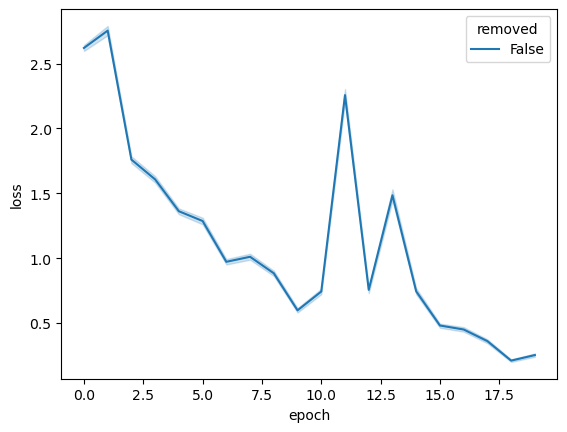

In [23]:
sns.lineplot(x='epoch', y='loss', data=results_df, hue='removed')

<AxesSubplot:xlabel='epoch', ylabel='loss'>

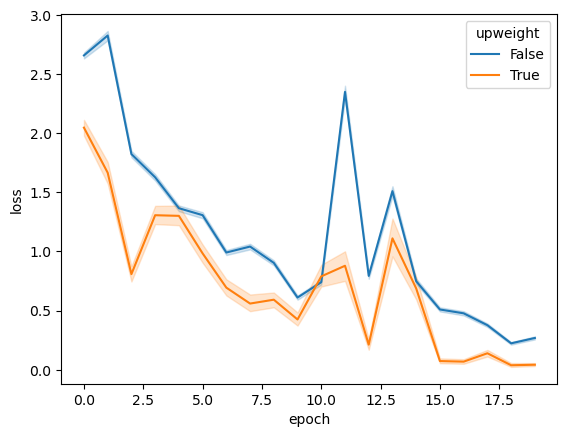

In [24]:
sns.lineplot(x='epoch', y='loss', data=results_df, hue='upweight')

In [18]:
print(len(train_set))
for e in results_df['epoch'].unique():
    epoch_results = results_df[results_df.epoch == e]
    print(e, len(epoch_results))

13734
9 13734
7 13734
0 13734
14 13734
13 13734
1 13734
6 13734
8 13734
12 13734
15 13734
16 13734
11 13734
18 13734
5 13734
2 13734
19 13734
10 13734
17 13734
3 13734
4 13734


In [27]:
args = OmegaConf.load('configs/imagenetteCombined/noisy.yaml')
args.data.train_first_split = 'all'
base      = OmegaConf.load('configs/base.yaml')
args      = OmegaConf.merge(base, args)
args.exp.run = 'maybe-fixed-base-noisy'

torch.manual_seed(args.seed)
np.random.seed(args.seed)

train_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='train'), args)
val_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='val'), args)
test_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='test'), args)

# load results
results_dir = f'predictions/ExpandedImagenette/maybe-fixed-base-noisy/all'
results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'eval-train', f)) for f in os.listdir(os.path.join(results_dir, 'eval-train'))])
val_results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'val', f)) for f in os.listdir(os.path.join(results_dir, 'val'))])

idxs, groups = train_set.dataset.datasets[1].get_upweight_samples()
removed_idxs, upweight_idxs = train_set.noisy_idxs, idxs
results_df['removed'] = results_df.image_id.isin(removed_idxs)
results_df['upweight'] = results_df.image_id.isin(upweight_idxs)
results_df


Get dataset ExpandedImagenette
groups [0 0 0 ... 8 8 8]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]


,image_id,stage,epoch,label,prediction,loss,conf,group,removed,upweight
0,0,all,20,0.0,0.0,0.007741,0.992289,0.0,False,False
1,1,all,20,0.0,0.0,0.000008,0.999992,0.0,False,False
2,2,all,20,0.0,0.0,0.000172,0.999828,0.0,False,False
3,3,all,20,0.0,0.0,0.035014,0.965592,0.0,False,False
4,4,all,20,0.0,0.0,0.002208,0.997794,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
13729,13729,all,16,1.0,1.0,0.302229,0.739169,7.0,False,False
13730,13730,all,16,1.0,1.0,0.768983,0.463484,7.0,False,False
13731,13731,all,16,1.0,1.0,0.914071,0.400889,8.0,False,False
13732,13732,all,16,1.0,0.0,2.045568,0.700221,8.0,False,False


<AxesSubplot:xlabel='epoch', ylabel='loss'>

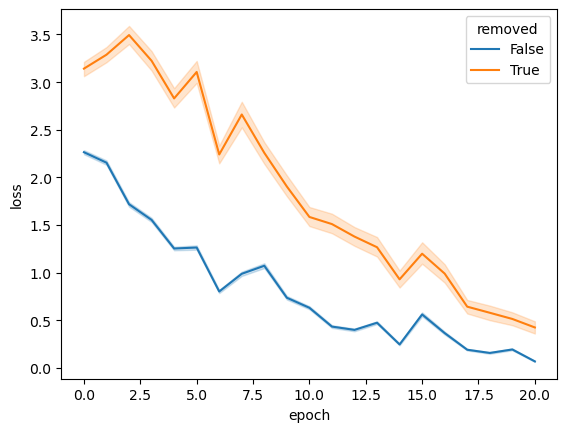

In [28]:
sns.lineplot(x='epoch', y='loss', data=results_df, hue='removed')

<AxesSubplot:xlabel='epoch', ylabel='loss'>

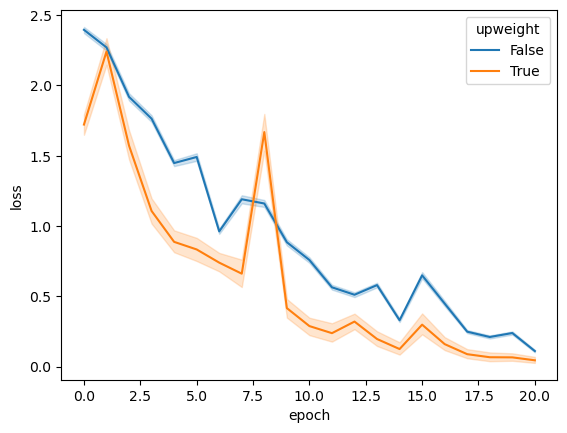

In [29]:
sns.lineplot(x='epoch', y='loss', data=results_df, hue='upweight')

In [38]:
args = OmegaConf.load('configs/imagenetteCombined/noisy.yaml')
args.data.train_first_split = 'all'
base      = OmegaConf.load('configs/base.yaml')
args      = OmegaConf.merge(base, args)
args.exp.run = 'maybe-fixed-base-noisy-oracle'
args.exp.oracle = True

torch.manual_seed(args.seed)
np.random.seed(args.seed)

train_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='train'), args)
val_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='val'), args)
test_set = BaseDataset(get_dataset(args.data.dataset, cfg=args, split='test'), args)

# load results
results_dir = f'predictions/ExpandedImagenette/maybe-fixed-base-noisy-oracle/all'
results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'eval-train', f)) for f in os.listdir(os.path.join(results_dir, 'eval-train'))])
val_results_df = pd.concat([pd.read_csv(os.path.join(results_dir, 'val', f)) for f in os.listdir(os.path.join(results_dir, 'val'))])


idxs, groups = train_set.dataset.datasets[1].get_upweight_samples()
removed_idxs, upweight_idxs = train_set.noisy_idxs, idxs
results_df['removed'] = results_df.image_id.isin(removed_idxs)
results_df['upweight'] = results_df.image_id.isin(upweight_idxs)
results_df = results_df[results_df.removed == False]
results_df


Get dataset ExpandedImagenette
groups [0 0 0 ... 8 8 8]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]
Get dataset ExpandedImagenette
groups [0 0 0 ... 9 9 9]


,image_id,stage,epoch,label,prediction,loss,conf,group,removed,upweight
0,0,all,8,0.0,1.0,38.991848,1.0,0.0,False,False
1,1,all,8,0.0,1.0,51.422726,1.0,0.0,False,False
2,2,all,8,0.0,1.0,83.874588,1.0,0.0,False,False
3,3,all,8,0.0,1.0,46.455765,1.0,0.0,False,False
4,4,all,8,0.0,1.0,41.941654,1.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
13729,13729,all,2,1.0,1.0,-0.000000,1.0,7.0,False,False
13730,13730,all,2,1.0,1.0,-0.000000,1.0,7.0,False,False
13731,13731,all,2,1.0,1.0,-0.000000,1.0,8.0,False,False
13732,13732,all,2,1.0,1.0,-0.000000,1.0,8.0,False,False


<AxesSubplot:xlabel='epoch', ylabel='loss'>

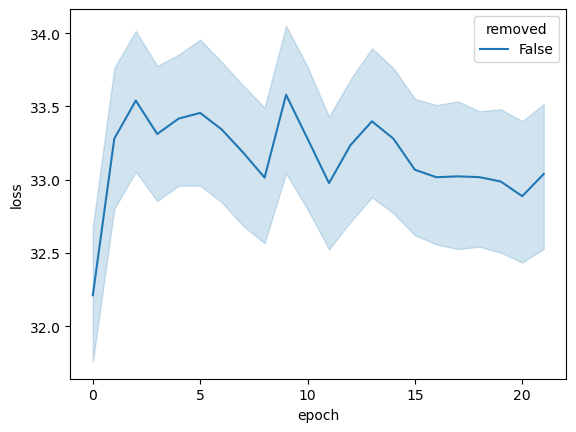

In [40]:
sns.lineplot(x='epoch', y='loss', data=results_df, hue='removed')

<AxesSubplot:xlabel='epoch', ylabel='loss'>

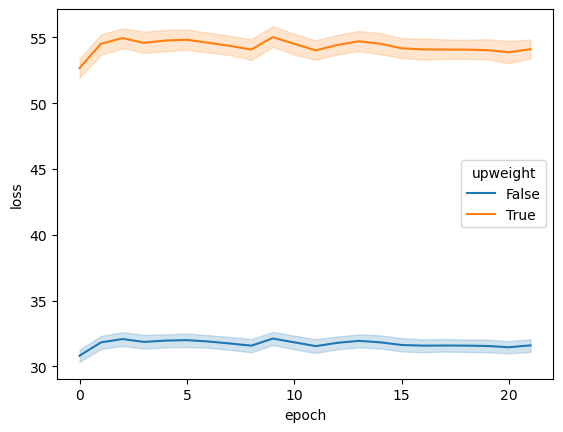

In [41]:
sns.lineplot(x='epoch', y='loss', data=results_df, hue='upweight')